In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


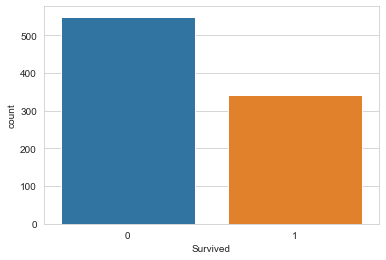

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df)

In [6]:
def get_missing_vals(features):
    data_features_na = features.isnull().sum()
    data_features_na = data_features_na[data_features_na>0]
    print(data_features_na.sort_values(ascending=False))

In [7]:
get_missing_vals(train_df)

Cabin       687
Age         177
Embarked      2
dtype: int64


In [8]:
get_missing_vals(test_df)

Cabin    327
Age       86
Fare       1
dtype: int64


In [9]:
def missingValsAssignment(data):
    for dataset in data:
        #Dropping cabin
        dataset.drop('Cabin',axis=1,inplace=True)
        
        #Handling Embarked
        common_value = 'S'
        dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
        ports = {"S": 0, "C": 1, "Q": 2}
        dataset['Embarked'] = dataset['Embarked'].map(ports)
        
        #Handling missing vals in Age
        mean = train_df["Age"].mean()
        std = test_df["Age"].std()
        is_null = dataset["Age"].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_age = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        age_slice = dataset["Age"].copy()
        age_slice[np.isnan(age_slice)] = rand_age
        dataset["Age"] = age_slice
        dataset["Age"] = train_df["Age"].astype(int)
        
        #Handling flare
        dataset['Fare'] = dataset['Fare'].fillna(0)
        dataset['Fare'] = dataset['Fare'].astype(int)
        
        #Converting Sex to numerics
        genders = {"male": 0, "female": 1}
        dataset['Sex'] = dataset['Sex'].map(genders)
    return data 

In [10]:
data = [train_df,test_df]
data = missingValsAssignment(data)

In [11]:
y_train = np.array(train_df['Survived']).reshape((-1,1))
train_df = train_df.drop(['Survived','Name','Ticket','PassengerId'],axis = 1)
test_df = test_df.drop(['Name','Ticket','PassengerId'],axis = 1)


In [12]:
for dataset in data:
    dataset = pd.get_dummies(dataset).reset_index(drop=True)

In [13]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7,0
1,1,1,38,1,0,71,1
2,3,1,26,0,0,7,0
3,1,1,35,1,0,53,0
4,3,0,35,0,0,8,0


In [14]:
X_train,X_test = train_df,test_df

In [15]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.ravel())

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

96.52


In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

79.35


In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.ravel())
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

96.52
